
# Case Based Kajian Learning
Topik: Klasifikasi Breast Cancer Wisconsin (Diagnostic)

Group K:
1. Embun Nawang Sari     - 1301220198
2. Salma Safira Ramandha - 1301223383
3. Rayhan Dhika Setiawan - 1301220395

**Dataset**: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Jenis dataset: Klasifikasi

## Pendahuluan

Kanker payudara merupakan salah satu jenis kanker yang paling umum di kalangan wanita di seluruh dunia. Deteksi dini sangat penting untuk meningkatkan peluang kesembuhan dan mengurangi angka kematian. Oleh karena itu, pengembangan model klasifikasi yang efektif untuk membedakan antara tumor ganas dan jinak menjadi sangat penting. Dalam penelitian ini, kami akan menggunakan dataset Breast Cancer Wisconsin (Diagnostic) untuk membangun model klasifikasi menggunakan algoritma Naive Bayes dan K-Nearest Neighbors (KNN).

# Paparan Data


Dataset yang digunakan adalah Breast Cancer Wisconsin (Diagnostic), yang terdiri dari 569 sampel dengan 30 fitur. Fitur-fitur ini dihitung dari gambar digital aspirasi jarum halus (FNA) dari massa payudara dan menggambarkan karakteristik dari inti sel yang ada dalam gambar. Diagnosis ditandai sebagai 'M' untuk ganas (malignant) dan 'B' untuk jinak (benign).

Statistik Dasar:
1. Jumlah Sampel: 569
2. Jumlah Fitur: 30
3. Fitur Utama:ID number & Diagnosis (M = malignant, B = benign)

10 fitur real-valued untuk setiap inti sel:
1. Radius
2. Texture
3. Perimeter
4. Area
5. Smoothness
6. Compactness
7. Concavity
8. Concave points
9. Symmetry
10. Fractal dimension


# Masalah yang ingin diselesaikan
Masalah utama yang ingin diselesaikan adalah mengklasifikasikan tumor payudara sebagai ganas (malignant) atau jinak (benign) berdasarkan fitur-fitur yang diambil dari citra histopatologi. Dengan menggunakan algoritma pembelajaran mesin, kami bertujuan untuk menciptakan model yang dapat membantu dalam diagnosis

# Upload Dataset


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from typing import List
import math
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

file_url = "https://drive.google.com/uc?id=1ZMohLJfFufjFSZh5oS5bUNAKqP6rn2t5&export=download"
df = pd.read_csv(file_url)
df = df.loc[:, ~df.columns.str.contains("Unnamed")]
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Informasi Dataset

In [ ]:
# Informasi dataset
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perime

In [ ]:
# Statistik deskriptif
print("\nStatistik deskriptif dataset:")
print(df.describe())


Statistik deskriptif dataset:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           

In [ ]:
print(f'Missing value: {df.isna().sum().sum()}')
print(f'Duplicated value: {df.duplicated().sum().sum()}')

Missing value: 0
Duplicated value: 0


# Matrix Korelasi

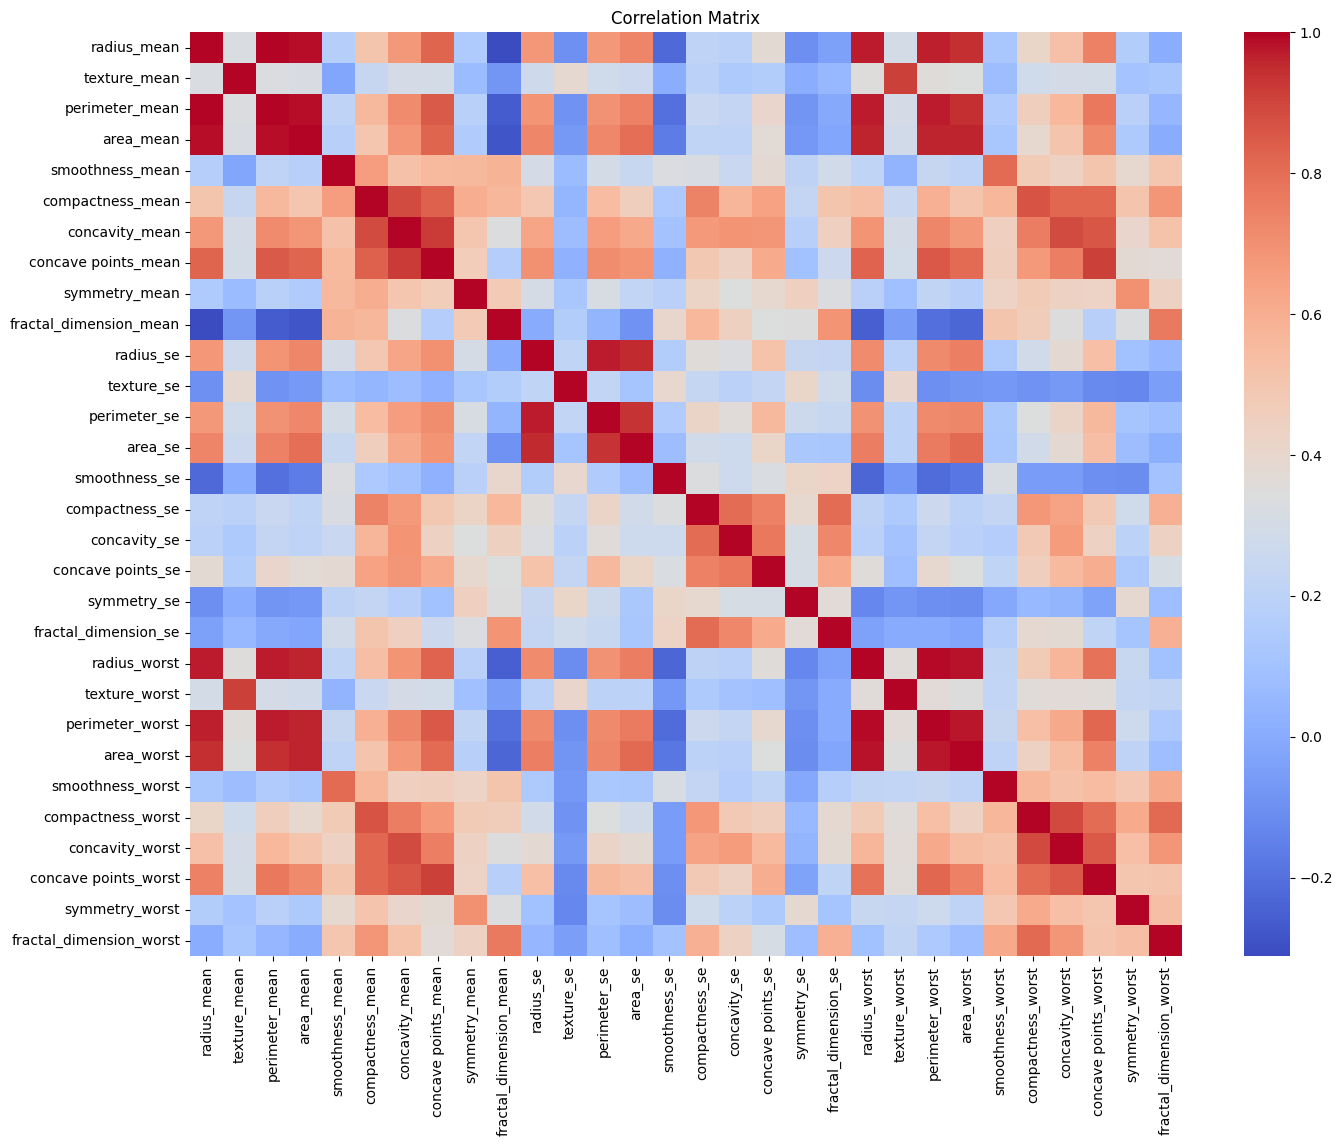

In [ ]:
plt.figure(figsize=(16, 12))
correlation_matrix = df.iloc[:, 2:].corr()  # Menggunakan fitur numerik saja (mulai dari kolom ke-3)
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Data Visualization (Sebelum Preprocessing)

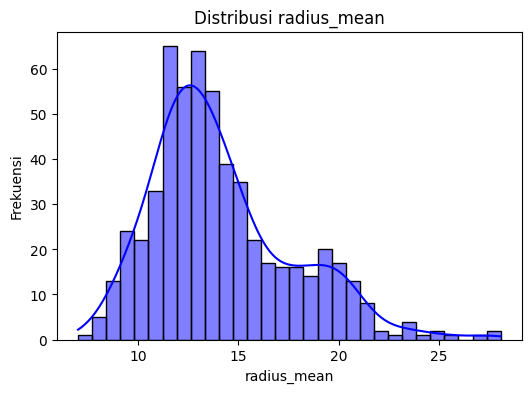

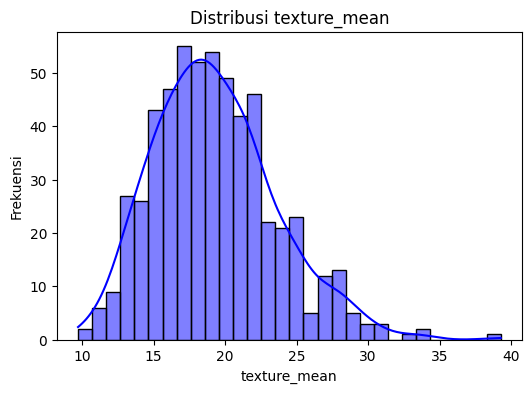

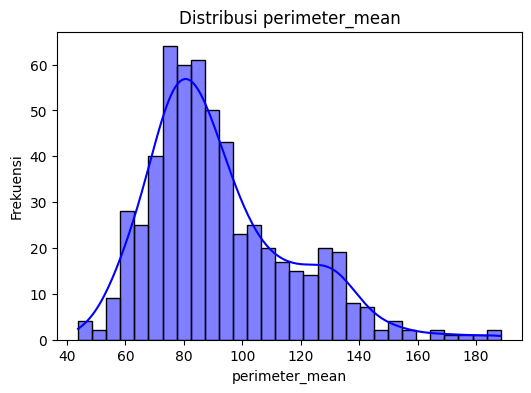

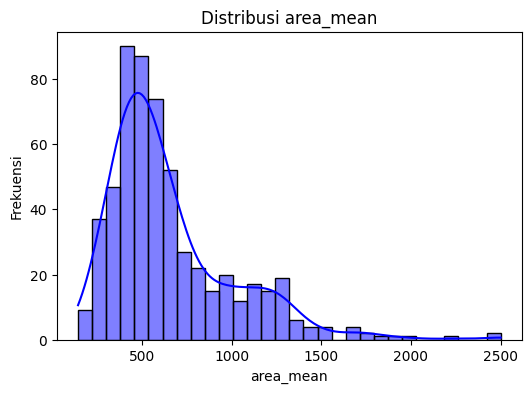

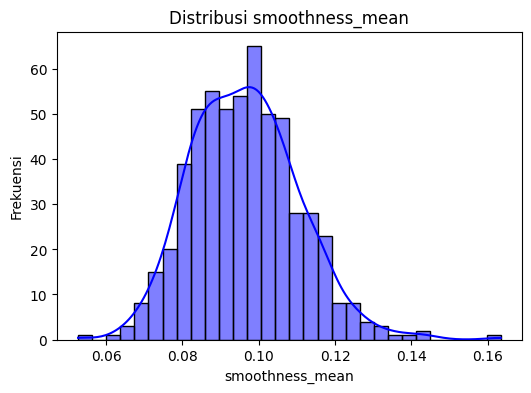

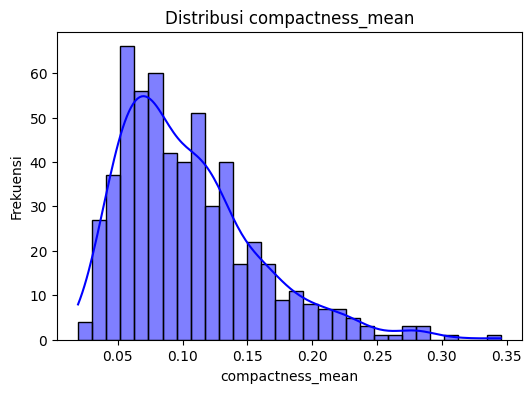

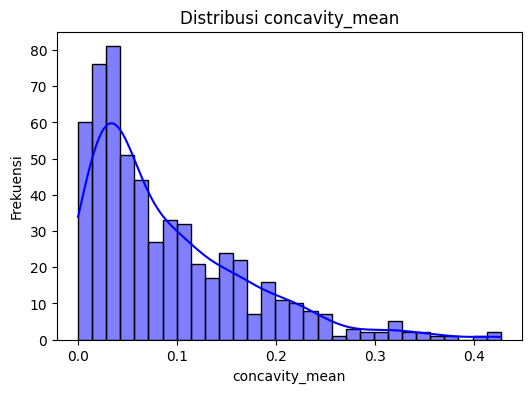

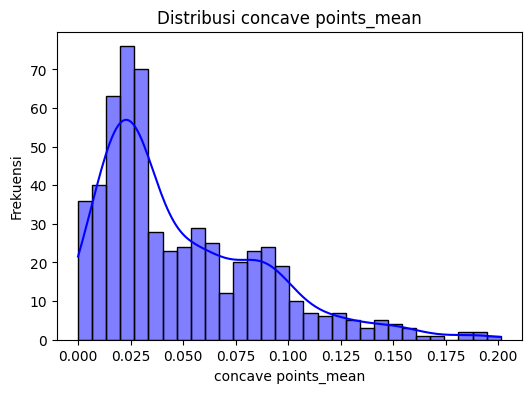

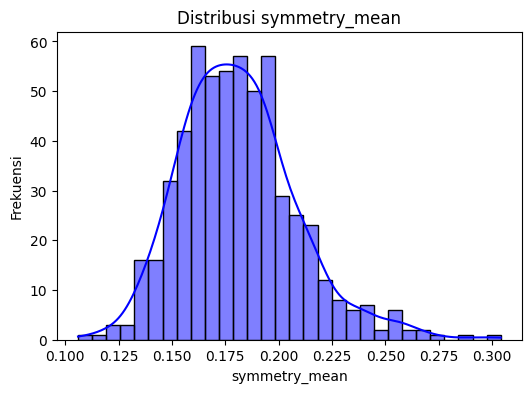

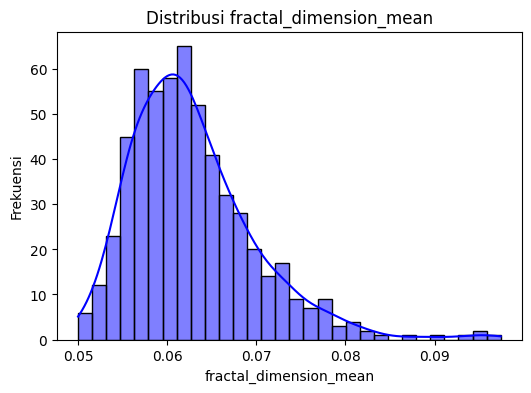

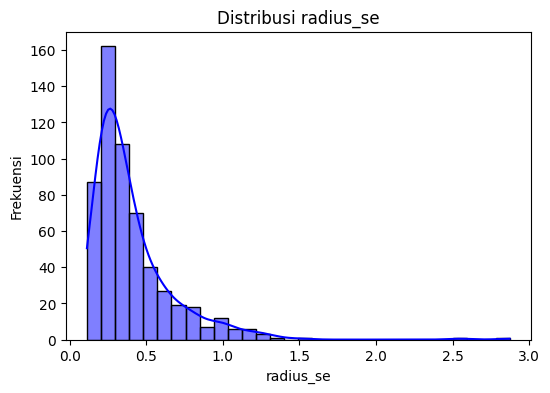

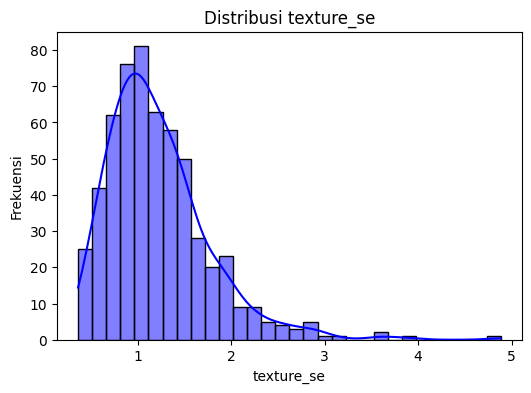

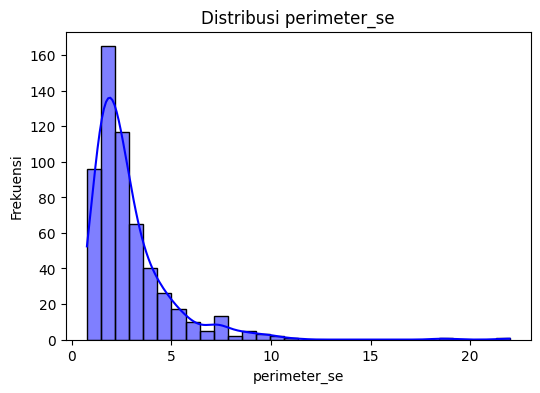

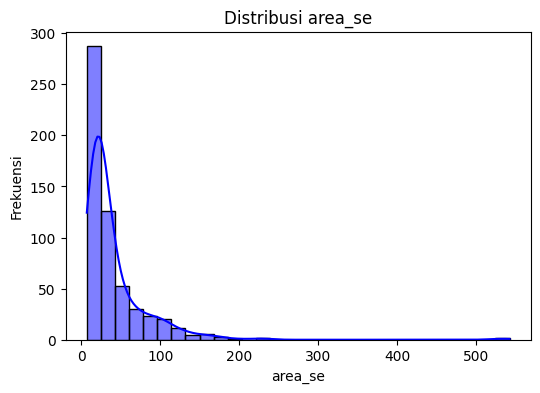

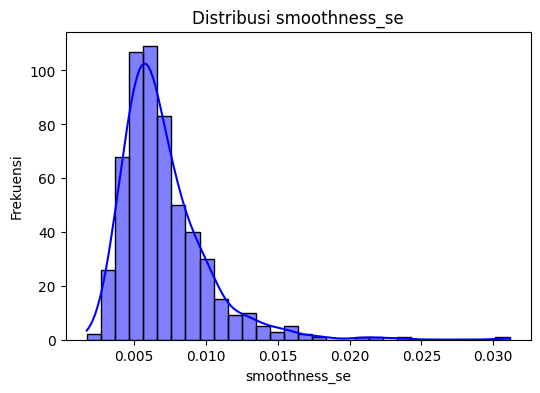

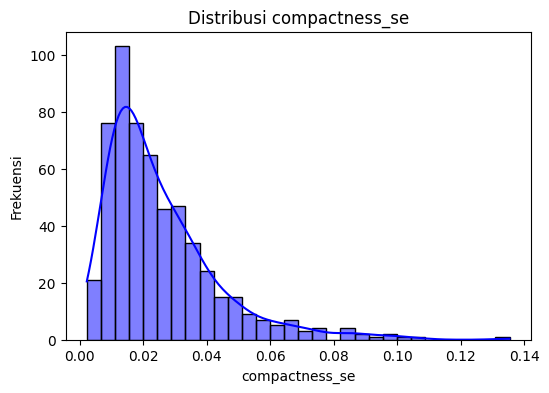

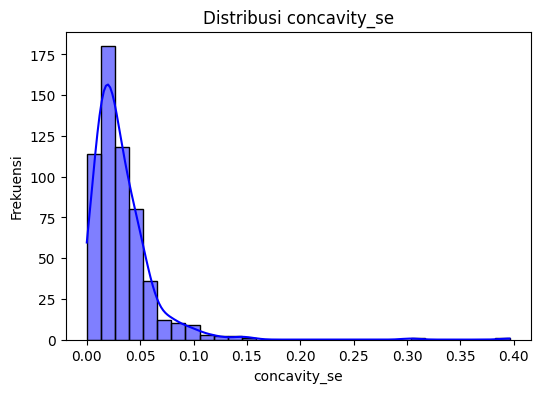

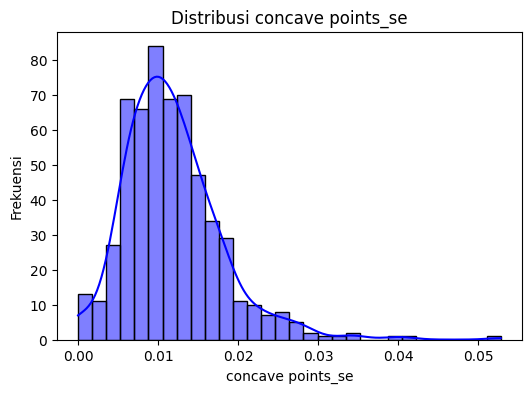

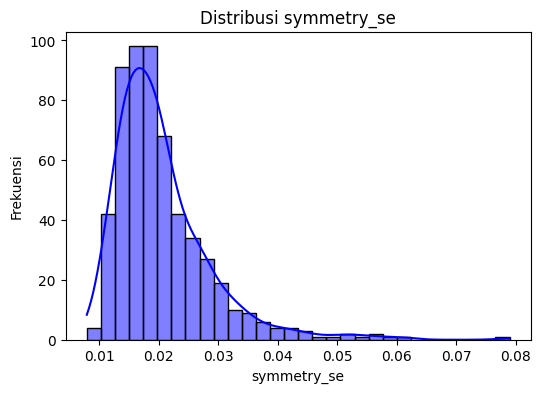

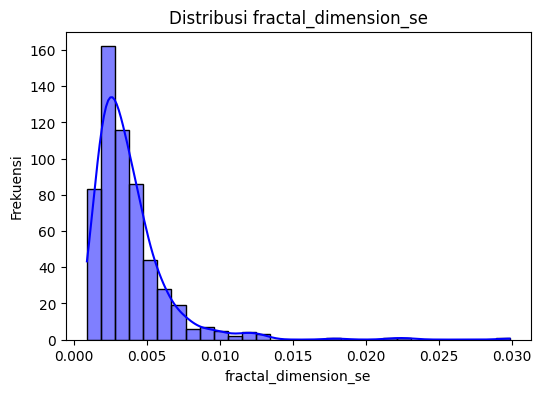

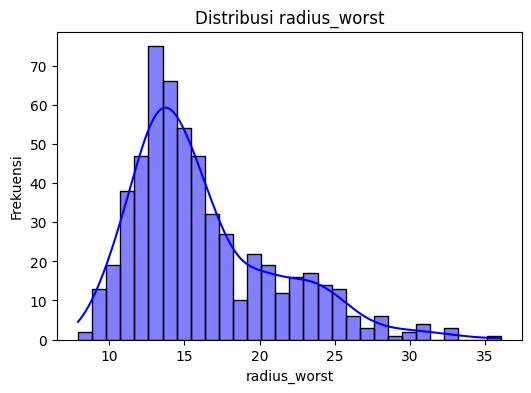

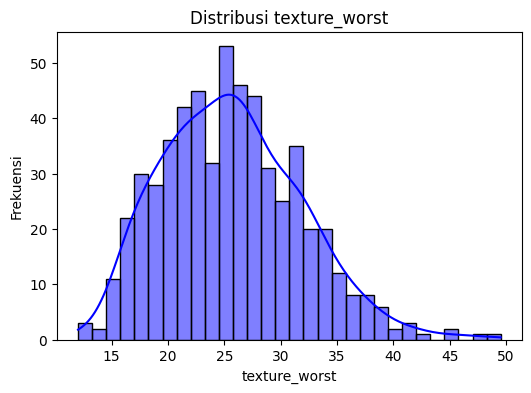

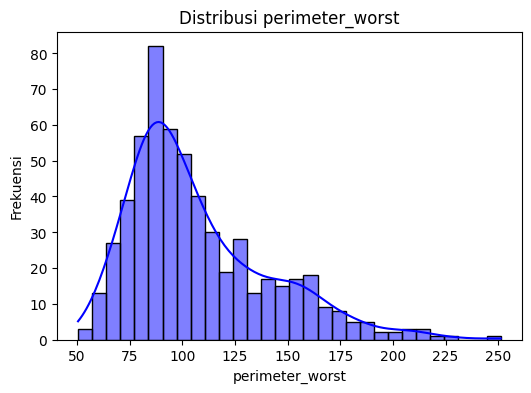

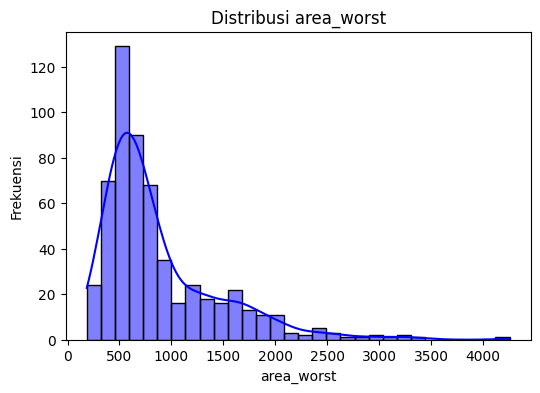

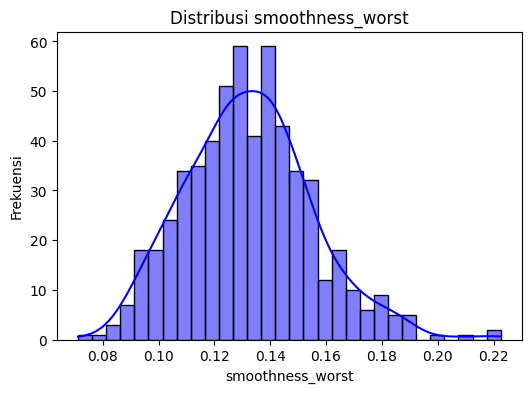

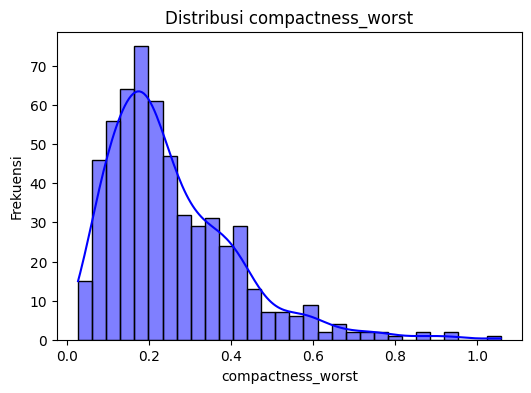

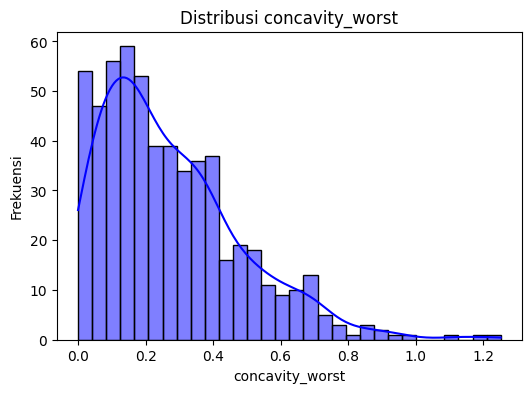

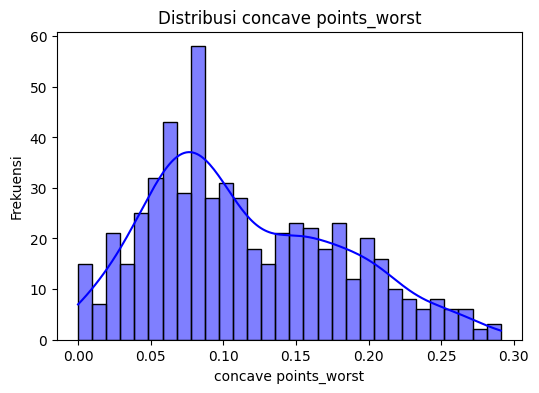

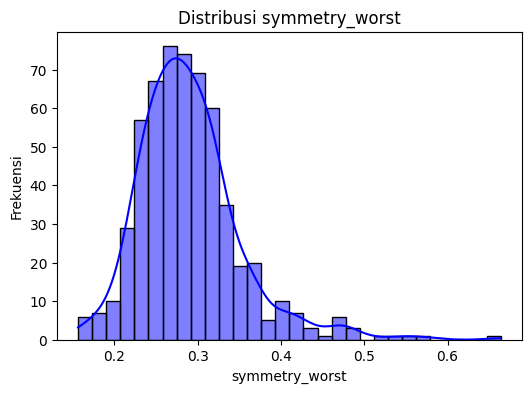

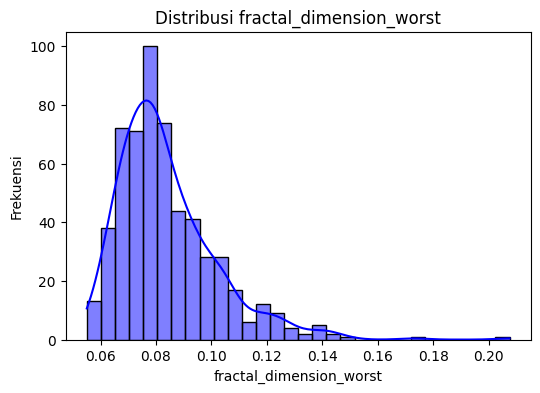

In [ ]:
numerical_features = df.select_dtypes(include=["float64", "int64"]).columns[1:]

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribusi {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frekuensi")
    plt.show()

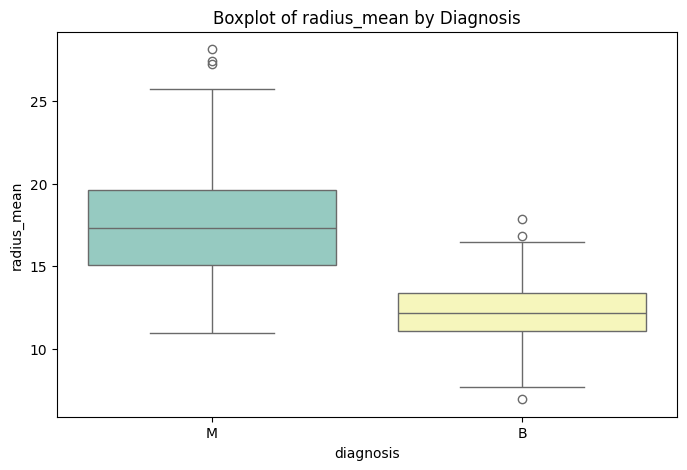

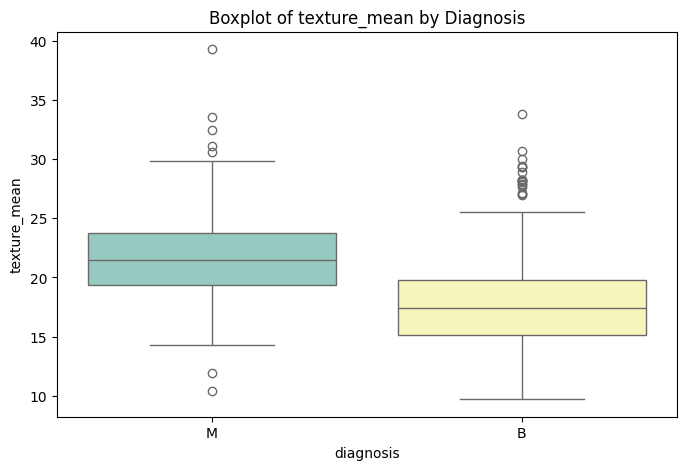

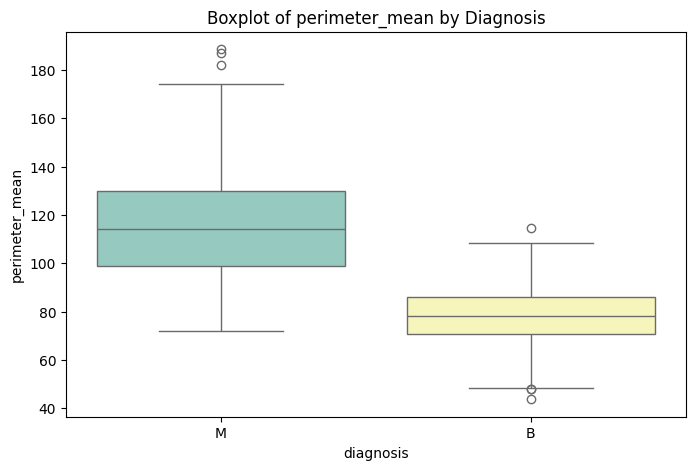

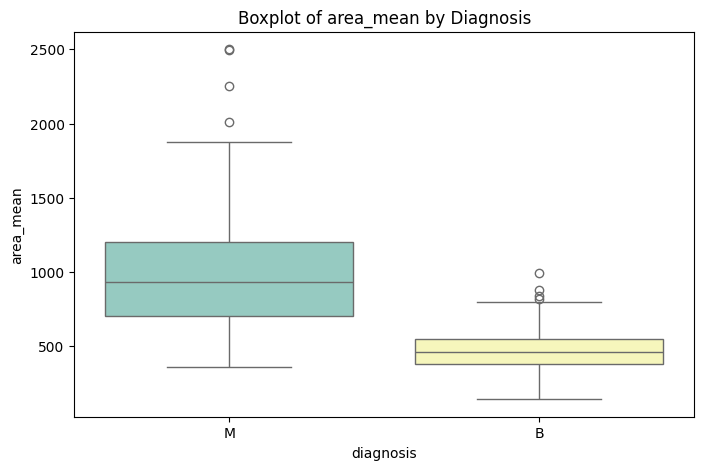

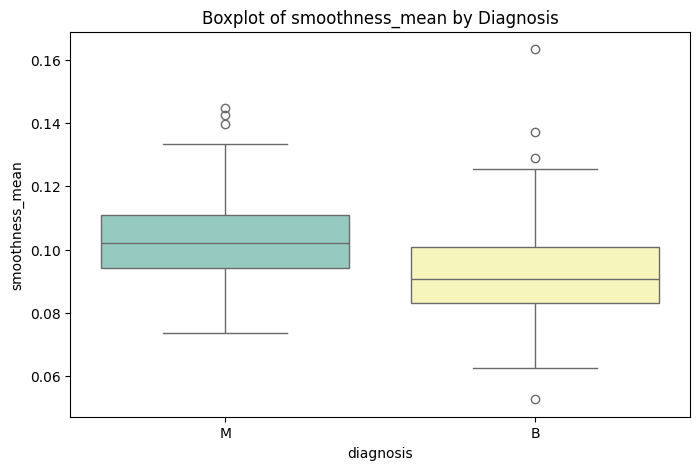

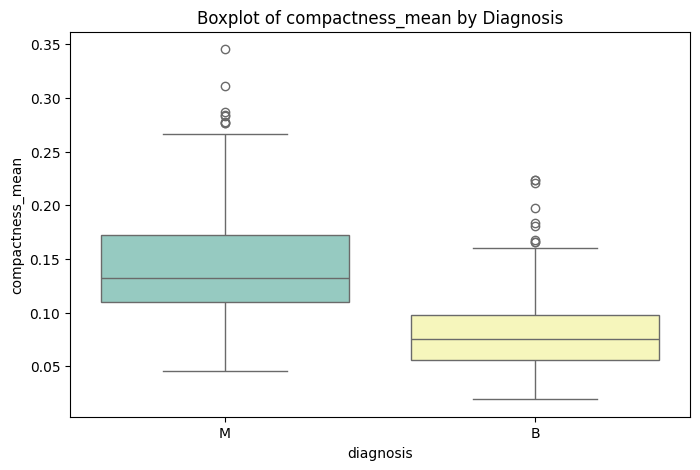

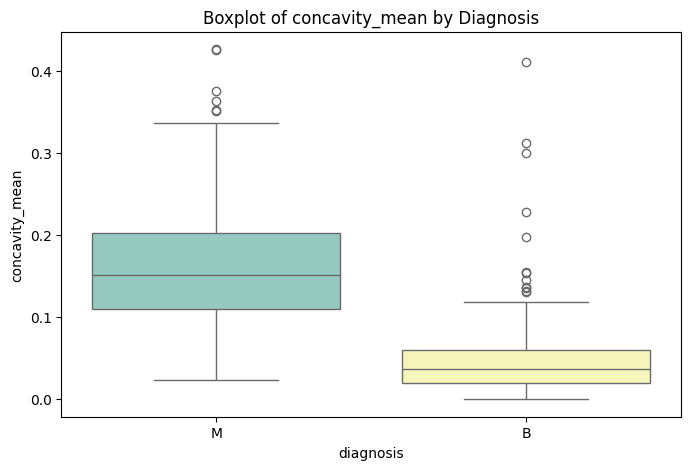

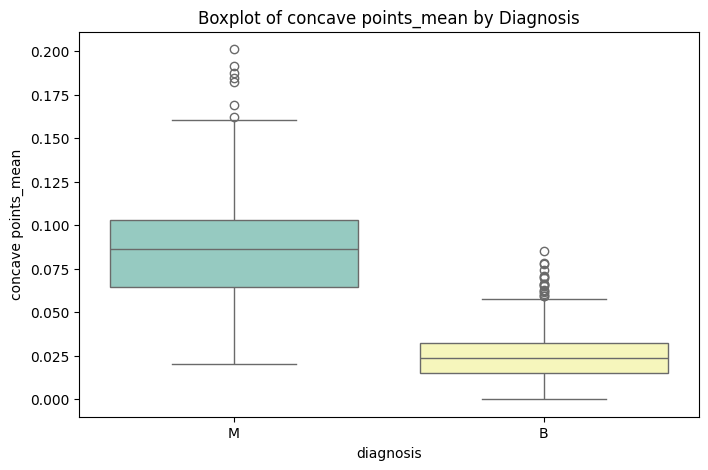

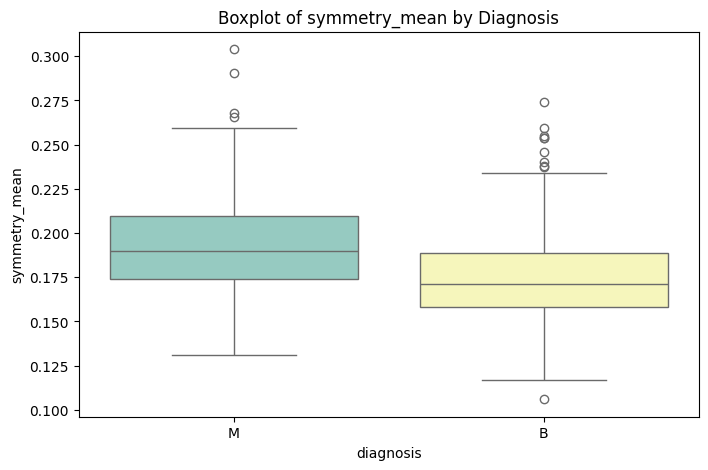

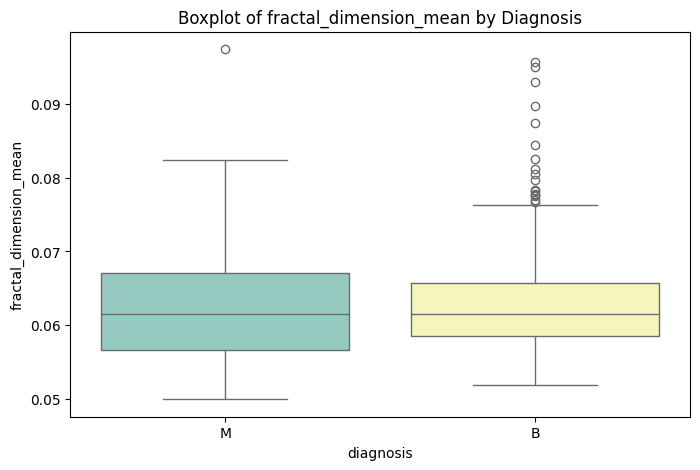

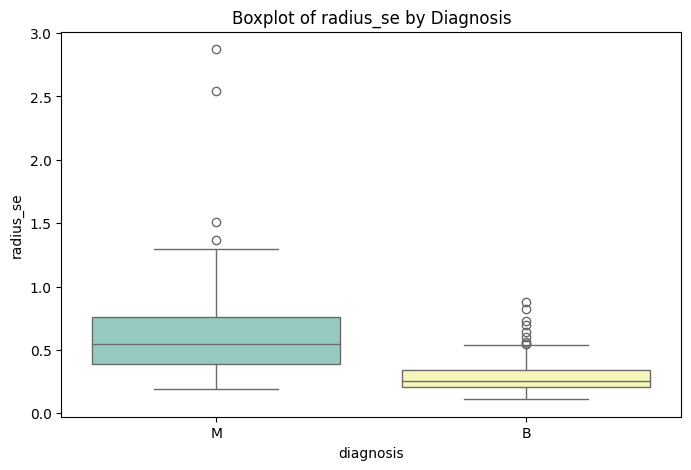

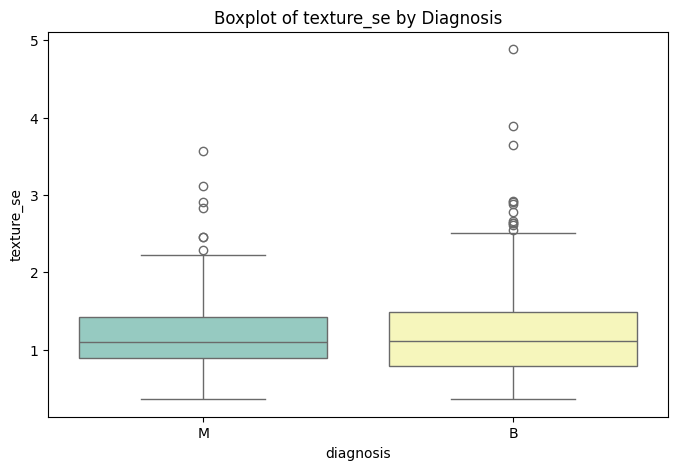

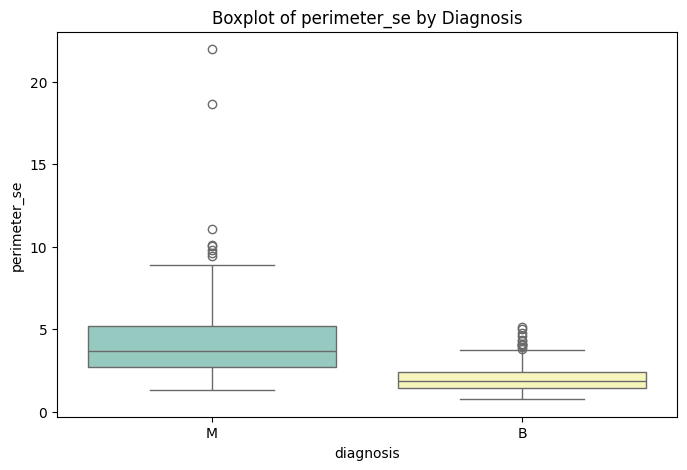

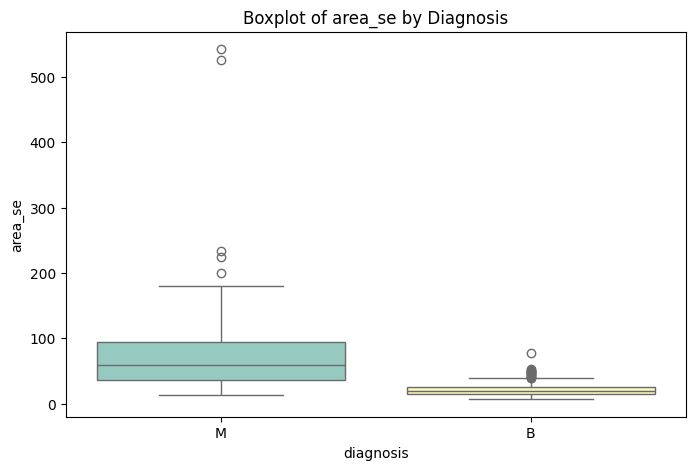

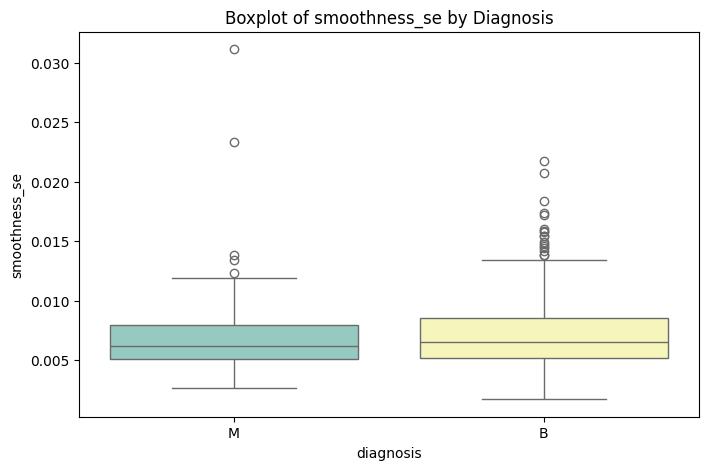

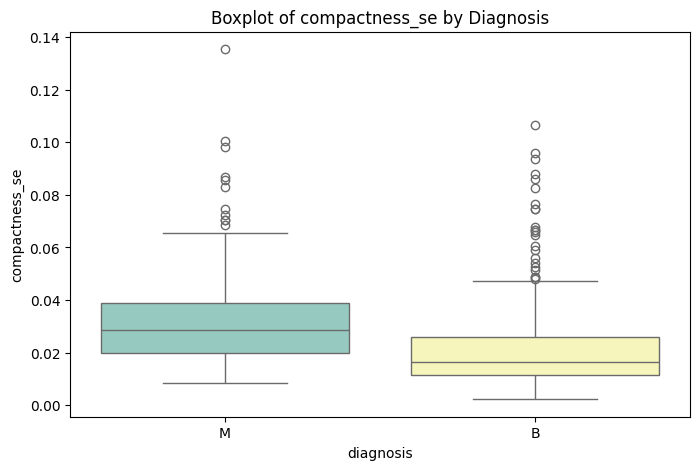

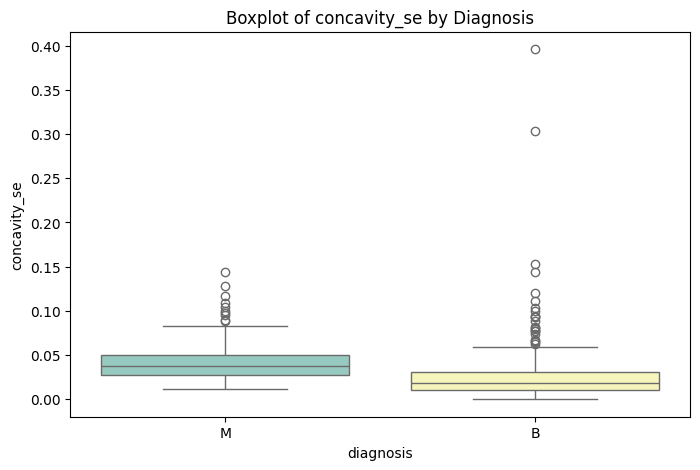

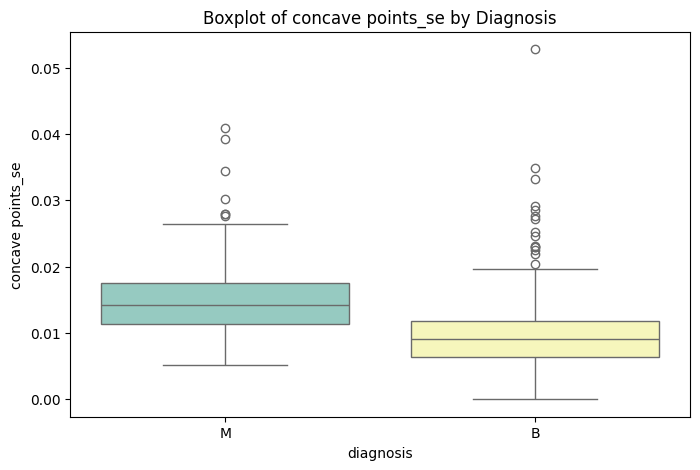

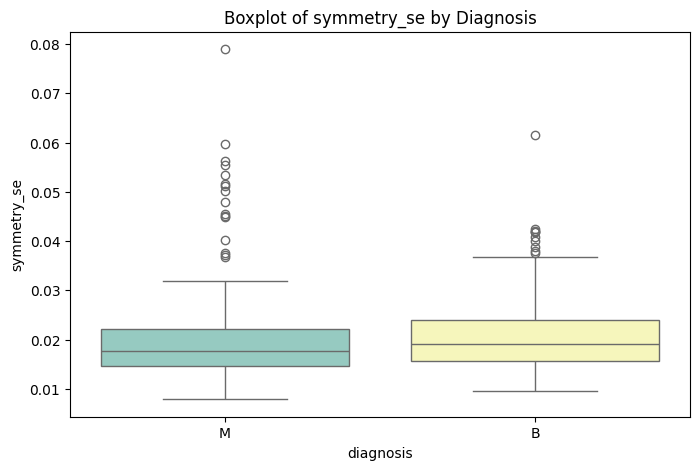

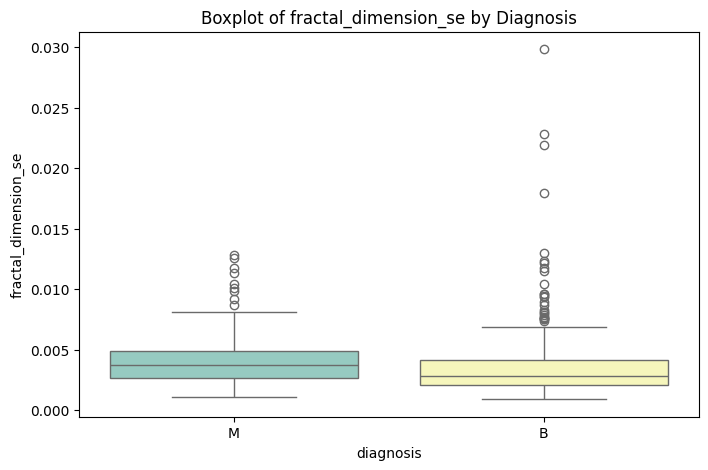

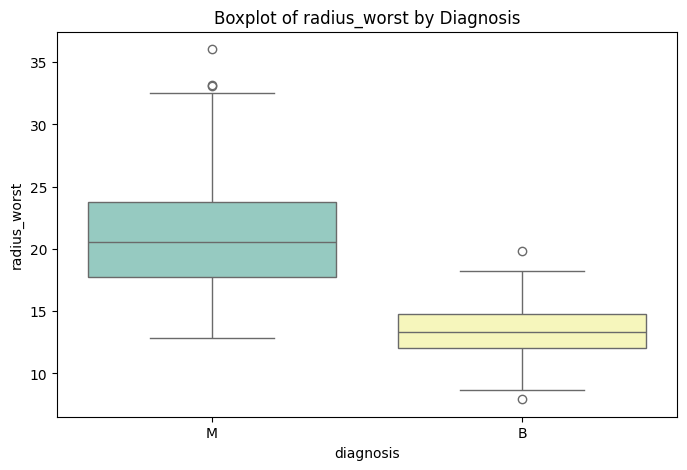

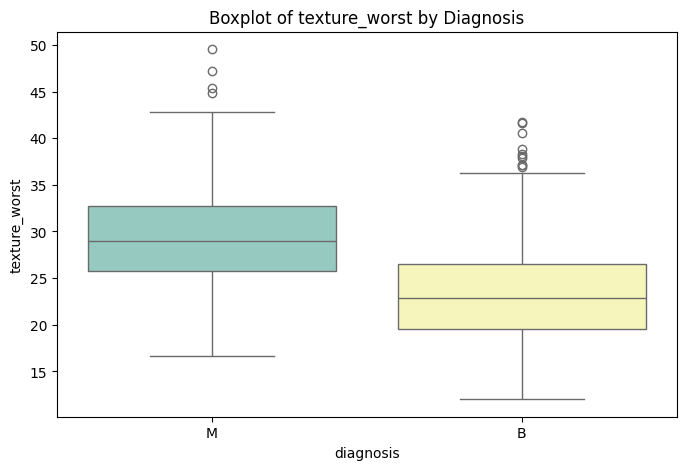

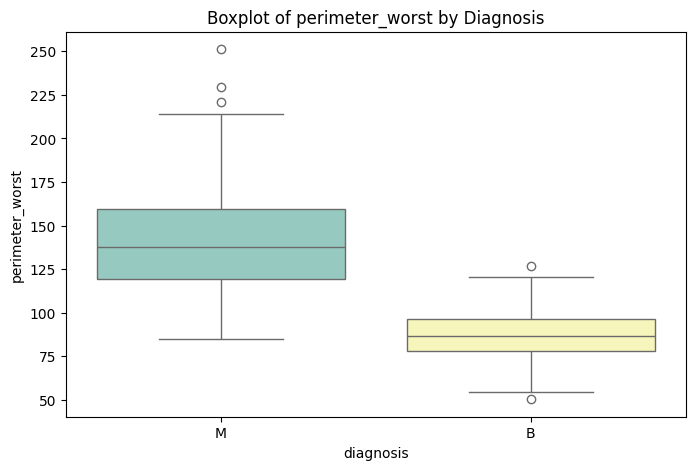

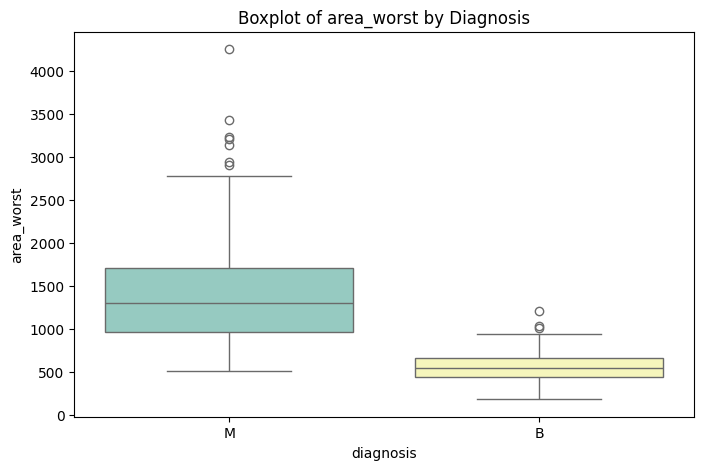

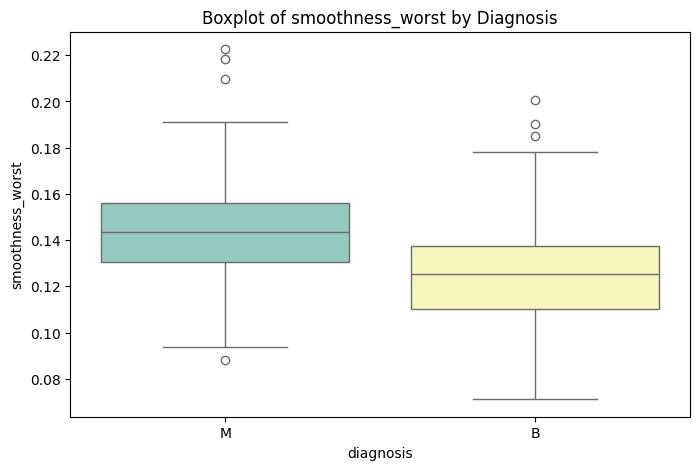

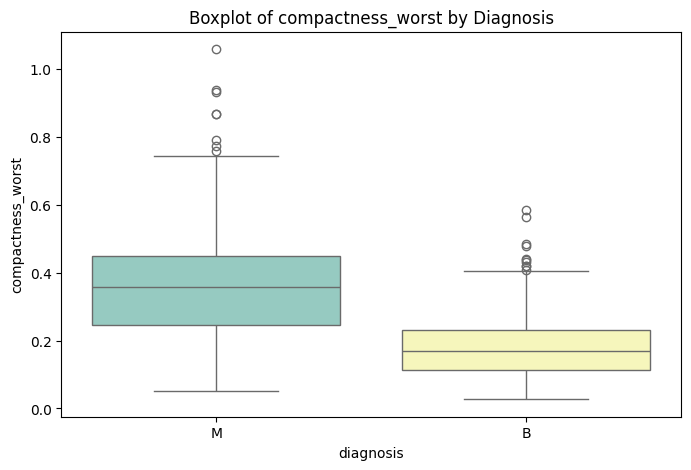

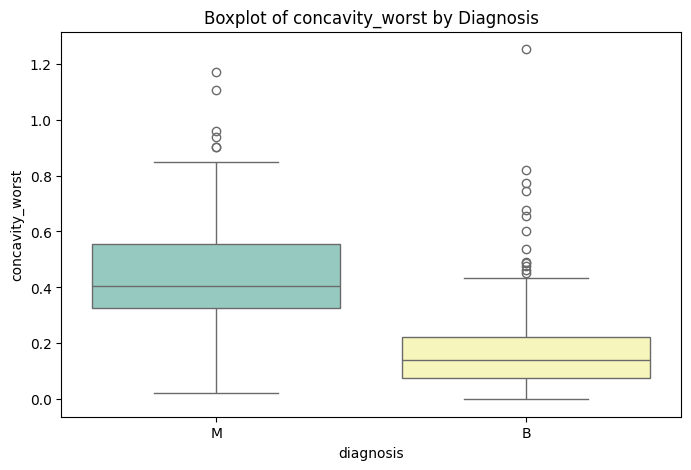

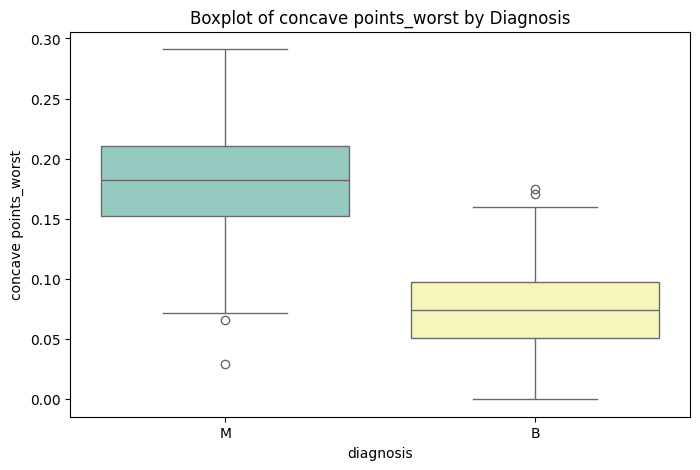

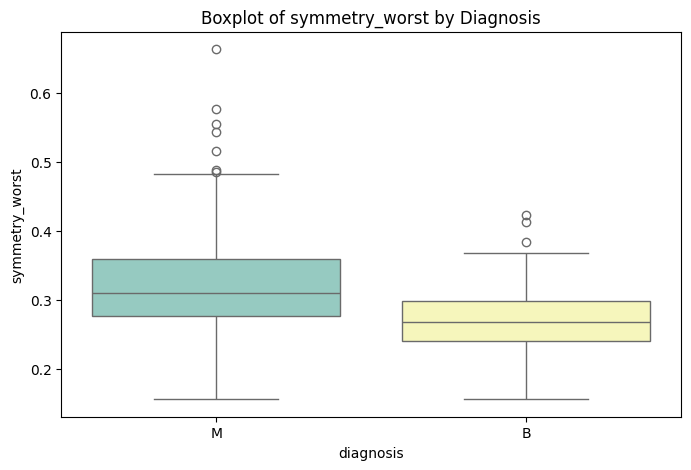

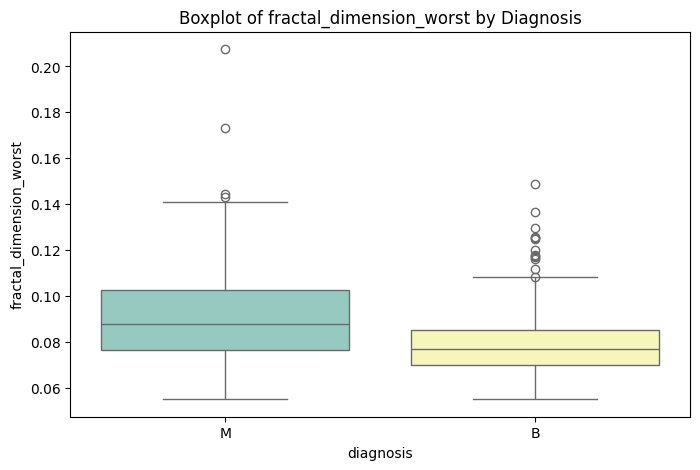

In [ ]:
# Visualisasi distribusi data berdasarkan diagnosis
for feature in df.columns[2:]:  # (selain ID dan Diagnosis)
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="diagnosis", y=feature, hue="diagnosis", data=df, palette="Set3")
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.show()

In [ ]:
# Menghapus data outlier
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Menghitung Q1 (quantile ke-25) dan Q3 (quantile ke-75) untuk setiap kolom numerik
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus baris yang memiliki outlier pada kolom numerik
df_no_outliers = df[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]

# df_no_outliers sekarang adalah DataFrame tanpa baris yang mengandung outlier

# Menampilkan hasil
print(df_no_outliers)


          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
6     844359         M        18.25         19.98          119.60     1040.0   
10    845636         M        16.02         23.24          102.70      797.8   
13    846381         M        15.85         23.95          103.70      782.7   
16    848406         M        14.68         20.13           94.74      684.5   
19   8510426         B        13.54         14.36           87.46      566.3   
..       ...       ...          ...           ...             ...        ...   
554   924632         B        12.88         28.92           82.50      514.3   
555   924934         B        10.29         27.61           65.67      321.4   
558   925277         B        14.59         22.68           96.39      657.1   
560   925292         B        14.05         27.15           91.38      600.4   
566   926954         M        16.60         28.08          108.30      858.1   

     smoothness_mean  compactness_mean 

In [ ]:
df=df_no_outliers

# Drop Kolom & Ubah Value Diagnosis ke Numeric

In [ ]:
# Mengganti value dari kolom diagnnosis menjadi bentuk int 1 atau 0
df = df.copy()
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# Menghapus kolom 'id' karena tidak diperlukan untuk model
df = df.drop(columns=['id'])

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['diagnosis'])  # Fitur untuk prediksi
y = df['diagnosis']  # Target variabel (diagnosis)

# DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Placeholder for dataset loading (you may need to specify the correct path or source)
def preprocess_data(df):

    # Step 1: Check for missing values
    print("Missing values before handling:")
    print(df.isnull().sum())

    # Handling missing values (example: fill numeric columns with median, categorical with mode)
    for column in df.select_dtypes(include=[np.number]).columns:
        df[column].fillna(df[column].median(), inplace=True)

    for column in df.select_dtypes(include=[object]).columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

    # Step 2: Encode categorical columns
    label_encoders = {}
    for column in df.select_dtypes(include=[object]).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    # Step 3: Feature scaling (normalize numeric features)
    scaler = StandardScaler()
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    # Step 4: Split dataset (assuming the last column is the target variable)
    X = df.iloc[:, :-1]  # All columns except the last one
    y = df.iloc[:, -1]   # The last column

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, scaler, label_encoders


# Data Visualization (After Preprocessing)

<Axes: xlabel='diagnosis', ylabel='count'>

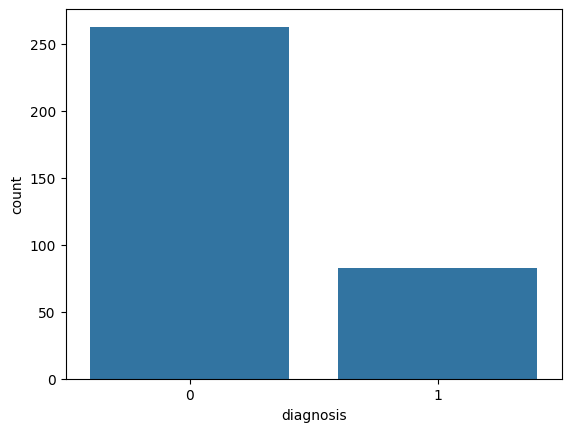

In [ ]:
sns.countplot(x='diagnosis', data=df)

# 1. METODE KNN

In [ ]:
# Fungsi normalisasi data
def normalize_data(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

In [ ]:
# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
# Fungsi untuk menemukan tetangga terdekat
def get_neighbors(train_data, train_labels, test_instance, k):
    distances = []
    for i in range(len(train_data)):
        dist = euclidean_distance(test_instance, train_data[i])
        distances.append((train_labels[i], dist))
    distances.sort(key=lambda x: x[1])  # Urutkan berdasarkan jarak
    neighbors = [distances[i][0] for i in range(k)]
    return neighbors

In [ ]:
# Fungsi prediksi berdasarkan KNN
def predict(train_data, train_labels, test_data, k):
    predictions = []
    for test_instance in test_data:
        neighbors = get_neighbors(train_data, train_labels, test_instance, k)
        majority_vote = Counter(neighbors).most_common(1)[0][0]
        predictions.append(majority_vote)
    return np.array(predictions)

In [ ]:
# Fungsi prediksi berdasarkan KNN
def predict(train_data, train_labels, test_data, k):
    predictions = []
    for test_instance in test_data:
        neighbors = get_neighbors(train_data, train_labels, test_instance, k)
        majority_vote = Counter(neighbors).most_common(1)[0][0]
        predictions.append(majority_vote)
    return np.array(predictions)

In [ ]:
labels = df['diagnosis'].values
data = df.drop(columns=['diagnosis']).values

# Normalisasi data
data = normalize_data(data)

# Membagi dataset menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Parameter k
k = 5

# Prediksi
y_pred = predict(X_train, y_train, X_test, k)

    # Menghitung akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc * 100:.2f}%")

Akurasi: 98.57%


# 2. METODE NAIVE BAYES

In [ ]:
# Membagi data ke x dan y, lalu menentukan data train dan testnya
y = df["diagnosis"]
X = df.drop(['diagnosis'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [ ]:
def accuracy_score(y_true, y_pred):
    """Menghitung akurasi prediksi."""
    return round(float(sum(y_pred == y_true)) / float(len(y_true)) * 100, 2)

In [ ]:
class NaiveBayes:
    """
    Gaussian Naive Bayes untuk dataset dengan fitur numerik.
    """
    def __init__(self):
        self.features = []
        self.mean_std_by_class = {}
        self.class_priors = {}
        self.classes = []

    def fit(self, X, y):
        """Melatih model menggunakan data X dan y."""
        self.features = list(X.columns)
        self.classes = np.unique(y)
        self.class_priors = {cls: len(y[y == cls]) / len(y) for cls in self.classes}

        # Menghitung mean dan std untuk setiap fitur dalam setiap kelas
        for cls in self.classes:
            self.mean_std_by_class[cls] = {
                feature: (X[y == cls][feature].mean(), X[y == cls][feature].std())
                for feature in self.features
            }

    def _gaussian_probability(self, x, mean, std):
        """Menghitung probabilitas distribusi Gaussian."""
        if std == 0:  # Untuk mencegah pembagian dengan nol
            return 1.0 if x == mean else 0.0
        exponent = math.exp(-((x - mean) ** 2) / (2 * (std ** 2)))
        return (1 / (math.sqrt(2 * math.pi) * std)) * exponent

    def predict(self, X):
        """Memprediksi kelas untuk setiap instance di X."""
        results = []
        for _, row in X.iterrows():
            probs = {}
            for cls in self.classes:
                # Prior probabilitas kelas
                probs[cls] = self.class_priors[cls]

                # Likelihood untuk setiap fitur
                for feature in self.features:
                    mean, std = self.mean_std_by_class[cls][feature]
                    probs[cls] *= self._gaussian_probability(row[feature], mean, std)

            # Pilih kelas dengan probabilitas posterior tertinggi
            results.append(max(probs, key=probs.get))
        return np.array(results)

In [ ]:
# Membuat model Naive Bayes dan melatihnya
nb_clf = NaiveBayes()  # Gunakan Gaussian Naive Bayes
nb_clf.fit(X_train, y_train)

test_accuracy = accuracy_score(y_test, nb_clf.predict(X_test))
print("Test Accuracy: {:.2f} %".format(test_accuracy))

Test Accuracy: 94.23 %


# Kesimpulan


pemodelan klasifikasi yang dilakukan menggunakan dataset Breast Cancer Wisconsin (Diagnostic) adalah sebagai berikut:

K-Nearest Neighbors (KNN):
Dengan parameter 𝑘=5, metode KNN menghasilkan akurasi sebesar 98.57% pada dataset uji. Hasil ini menunjukkan bahwa KNN sangat efektif dalam mengklasifikasikan data diagnosis kanker payudara. KNN memanfaatkan jarak antar data untuk membuat prediksi, dan akurasi tinggi ini mencerminkan bahwa distribusi data memungkinkan pemisahan yang jelas antar kelas.

Naive Bayes:
Metode Naive Bayes menghasilkan akurasi sebesar 94.23% pada dataset uji. Meskipun lebih rendah daripada KNN, hasil ini tetap menunjukkan performa yang baik. Naive Bayes mengasumsikan independensi antar fitur, yang mungkin tidak sepenuhnya sesuai dengan sifat data ini, tetapi masih cukup untuk menghasilkan prediksi yang akurat.

Perbandingan Kinerja:

KNN memiliki akurasi yang lebih tinggi dibandingkan Naive Bayes dalam klasifikasi dataset ini, kemungkinan besar karena KNN tidak mengasumsikan hubungan antar fitur tertentu dan lebih bergantung pada struktur data secara keseluruhan.
Naive Bayes, meskipun sedikit kurang akurat, memiliki keuntungan dari segi kecepatan dan efisiensi, terutama pada dataset yang lebih besar.
Rekomendasi Penggunaan:

KNN cocok digunakan jika akurasi tinggi menjadi prioritas utama dan dataset relatif kecil hingga sedang, karena KNN memiliki waktu komputasi yang lebih besar pada dataset besar.
Naive Bayes dapat menjadi pilihan jika kecepatan penting atau jika Anda bekerja dengan dataset yang sangat besar.
Hal ini menunjukkan bahwa baik KNN maupun Naive Bayes merupakan model yang layak untuk klasifikasi diagnosis kanker payudara, dengan KNN menawarkan akurasi yang lebih unggul dalam konteks dataset ini.